# Project3: Email Spam Detector

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as  plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("J:\Courses\Oasis Infobyte (Internship)\Projects\Pro 4 (Email Spam Detection - ML)\spam.csv", encoding="latin_1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### changing column names 


In [7]:
df = df.rename(columns = {'v1':'target' , 'v2':'text'})

In [8]:
df.sample(5)

,target,text
4860,ham,Nokia phone is lovly..
5452,ham,What???? Hello wats talks email address?
2949,ham,Where are you ? You said you would be here whe...
5505,ham,What i told before i tell. Stupid hear after i...
2626,ham,Unni thank you dear for the recharge..Rakhesh


In [9]:
#find if any NaN numbers is there in data
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
#Count observations in each label
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

### EDA Part

<Axes: ylabel='target'>

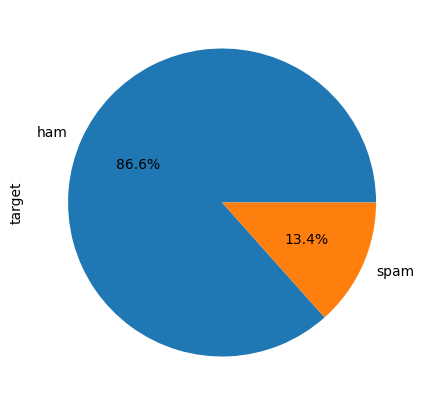

In [11]:
plt.figure(figsize = (5,5))
df['target'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')

#### Only Spam data 

In [12]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [13]:
spam = df.loc[df['target'] == 'spam']
spam['text'].sample(5)

2       Free entry in 2 a wkly comp to win FA Cup fina...
4744    Camera - You are awarded a SiPix Digital Camer...
3753    Bloomberg -Message center +447797706009 Why wa...
1672    URGENT! We are trying to contact U. Todays dra...
610     22 days to kick off! For Euro2004 U will be ke...
Name: text, dtype: object

### only ham data 

In [14]:
ham = df.loc[df['target'] == 'ham']
ham['text'].sample(5)

3240      Ok i've sent u da latest version of da project.
1944    Yeah, I'll leave in a couple minutes &amp; let...
4239    The LAY MAN! Just to let you know you are miss...
3646    Hey babe, my friend had to cancel, still up fo...
3726        Aldrine, rakhesh ex RTM here.pls call.urgent.
Name: text, dtype: object

## Preprocessing 

In [15]:
len(df)

5572

In [16]:
import nltk
import sklearn 

In [17]:
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [18]:
stemming_var = PorterStemmer()

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
Lemmatization_var = WordNetLemmatizer()

In [21]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
import re 
cleaned_data = []
for i in range(len(df)):
    result = re.sub("[^a-zA-Z0-9]",' ',df['text'][i])
    result = result.lower()
    result = result.split()
    result = [Lemmatization_var.lemmatize(word)  for word in result if not word in stopwords.words("english")]
    result = ' '.join(result)
    cleaned_data.append(result)
    

In [23]:
cleaned_data[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [24]:
df['cleaned_data'] = cleaned_data

In [25]:
df.head()

,target,text,cleaned_data
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [26]:
df = df.drop(['text'],axis = 1)

In [27]:
df.columns

Index(['target', 'cleaned_data'], dtype='object')

#### convert label to a numerical variable

In [28]:
df['target'] = df['target'].map({'ham':0 , 'spam':1}).astype(int)

In [29]:
df.target.value_counts()

0    4825
1     747
Name: target, dtype: int64

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
Co = CountVectorizer()

In [32]:
X = df['cleaned_data']
y = df['target']

In [33]:
X.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: cleaned_data, dtype: object

In [34]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: target, dtype: int32

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.33 , random_state = 42)

In [36]:
X_train.head()

3235    aight text back mu swing need somebody get door
945                          cant wait see photo useful
5319                            kothi print marandratha
5528                           effect irritation ignore
247                          kallis wont bat 2nd inning
Name: cleaned_data, dtype: object

In [37]:
X_train = Co.fit_transform(X_train)

In [38]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
X_train.shape

(3733, 6470)

In [40]:
X_train[0]

<1x6470 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [41]:
X_test = Co.transform(X_test)

In [42]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
X_test.shape

(1839, 6470)

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
ml = MultinomialNB()

In [46]:
ml.fit(X_train,y_train)

MultinomialNB()

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
ml.score(X_train,y_train)

0.994374497723011

In [49]:
ml.score(X_test,y_test)

0.9793365959760739

### Balancing the data 

In [50]:
df.head()

,target,cleaned_data
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


### Downsampling 

In [51]:
from imblearn.under_sampling import NearMiss

In [52]:
print("Labels count for ham 0 = {} ".format(sum(y_train == 0)))
print("Labels count for spam 1 = {} ".format(sum(y_train == 1)))

print()
print("Labels count for test ham 0 = {} ".format(sum(y_test == 0)))
print("Labels count for test spam 1 = {} ".format(sum(y_test == 1)))


undersample = NearMiss(version=1, n_neighbors=3)

X_train_res , y_train_res = undersample.fit_resample(X_train,y_train)
X_test_res , y_test_res = undersample.fit_resample(X_test,y_test)

print()

print("Labels count after for train ham 0 = {} ".format(sum(y_train_res == 0)))
print("Labels count after for train spam 1 = {} ".format(sum(y_train_res == 1)))

print()
print("Labels count after for test ham 0 = {} ".format(sum(y_test_res == 0)))
print("Labels count after for test spam 1 = {} ".format(sum(y_test_res == 1)))


Labels count for ham 0 = 3238 
Labels count for spam 1 = 495 

Labels count for test ham 0 = 1587 
Labels count for test spam 1 = 252 

Labels count after for train ham 0 = 495 
Labels count after for train spam 1 = 495 

Labels count after for test ham 0 = 252 
Labels count after for test spam 1 = 252 


In [53]:
mt = MultinomialNB()
mt.fit(X_train_res,y_train_res)
mt.score(X_train_res,y_train_res)

0.9454545454545454

In [54]:
mt = MultinomialNB()
mt.fit(X_train_res,y_train_res)
mt.score(X_test_res,y_test_res)

0.8650793650793651

### Upsampling 

In [55]:
print("Labels count for ham 0 = {} ".format(sum(y_train == 0))) 
print("Labels count for spam 1 = {} ".format(sum(y_train == 1))) 
  
print()


from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)  
  
print("Labels count after for train ham 0 = {} ".format(sum(y_train_up == 0))) 
print("Labels count after for train spam 1 = {} ".format(sum(y_train_up == 1))) 

print()
X_test_up, y_test_up = sm.fit_resample(X_test, y_test)

print("Labels count after for test ham 0 = {}".format(sum(y_test_up == 0))) 
print("Labels count after for test spam 1 = {}".format(sum(y_test_up == 1))) 

Labels count for ham 0 = 3238 
Labels count for spam 1 = 495 

Labels count after for train ham 0 = 3238 
Labels count after for train spam 1 = 3238 

Labels count after for test ham 0 = 1587
Labels count after for test spam 1 = 1587


In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [57]:
X_train_up

<6476x6470 sparse matrix of type '<class 'numpy.int64'>'
	with 87108 stored elements in Compressed Sparse Row format>

In [58]:
def svm(X_train_up,y_train_up,X_test_up,y_test_up):
    svm = SVC(C=1.0,kernel='rbf')
    svm.fit(X_train_up,y_train_up)
    print("Train Accuracy_score = {} ".format(svm.score(X_train_up,y_train_up)))
    print("Test Accuracy_score = {} ".format(svm.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = svm.predict(X_train_up)
    y_test_up_pred = svm.predict(X_test_up)
    print('Train confusion matrix = \n ',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix = \n ',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))
    

In [59]:
def RF(X_train_up,y_train_up,X_test_up,y_test_up):
    rf = RandomForestClassifier()
    rf.fit(X_train_up,y_train_up)
    print("Train Accuracy_score = {} ".format(rf.score(X_train_up,y_train_up)))
    print("Test Accuracy_score = {} ".format(rf.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = rf.predict(X_train_up)
    y_test_up_pred = rf.predict(X_test_up)
    print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix =\n ',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))

In [60]:
def DT(X_train_up,y_train_up,X_test_up,y_test_up):
    dt = DecisionTreeClassifier()
    dt.fit(X_train_up,y_train_up)
    print("Train Accuracy_score = {} ".format(dt.score(X_train_up,y_train_up)))
    print("Test Accuracy_score = {} ".format(dt.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = dt.predict(X_train_up)
    y_test_up_pred = dt.predict(X_test_up)
    print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix = \n',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))

In [61]:
def NB(X_train_up,y_train_up,X_test_up,y_test_up):
    nb = MultinomialNB()
    nb.fit(X_train_up,y_train_up)
    print("Train Accuracy_score = {} ".format(nb.score(X_train_up,y_train_up)))
    print("Test Accuracy_score = {} ".format(nb.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = nb.predict(X_train_up)
    y_test_up_pred = nb.predict(X_test_up)
    print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix = \n ',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))

In [62]:
def LR(X_train_up,y_train_up,X_test_up,y_test_up):
    lg = LogisticRegression()
    lg.fit(X_train_up,y_train_up)
    print("Train Accuracy_score = {} ".format(lg.score(X_train_up,y_train_up)))
    print("Test Accuracy_score = {} ".format(lg.score(X_test_up,y_test_up)))
    print()
    print('---------- confusion matrix ------------')
    y_train_up_pred = lg.predict(X_train_up)
    y_test_up_pred = lg.predict(X_test_up)
    print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
    print('test confusion matrix = \n',confusion_matrix(y_test_up , y_test_up_pred))
    print()
    print('----Classification Report -------')
    print('Train = ',classification_report(y_train_up , y_train_up_pred))
    print("Test = ",classification_report(y_test_up , y_test_up_pred))

In [63]:
def checking(X_train_up,y_train_up,X_test_up,y_test_up):
    print('SVM')
    svm(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('Random Forest')
    RF(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('Decision Tree')
    DT(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('Naive Bayes')
    NB(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    print('Logistic Regression')
    LR(X_train_up,y_train_up,X_test_up,y_test_up)
    print('*'*100)
    
    
    
    

In [64]:
checking(X_train_up,y_train_up,X_test_up,y_test_up)

SVM
Train Accuracy_score = 0.987183446571958 
Test Accuracy_score = 0.9325771896660365 

---------- confusion matrix ------------
Train confusion matrix = 
  [[3168   70]
 [  13 3225]]
test confusion matrix = 
  [[1457  130]
 [  84 1503]]

----Classification Report -------
Train =                precision    recall  f1-score   support

           0       1.00      0.98      0.99      3238
           1       0.98      1.00      0.99      3238

    accuracy                           0.99      6476
   macro avg       0.99      0.99      0.99      6476
weighted avg       0.99      0.99      0.99      6476

Test =                precision    recall  f1-score   support

           0       0.95      0.92      0.93      1587
           1       0.92      0.95      0.93      1587

    accuracy                           0.93      3174
   macro avg       0.93      0.93      0.93      3174
weighted avg       0.93      0.93      0.93      3174

*******************************************************

#### Since Logistic Regression gives highest Accuracy we can procees with logistic Regression 

In [65]:
lg = LogisticRegression()
lg.fit(X_train_up,y_train_up)
print("Train Accuracy_score = {} ".format(lg.score(X_train_up,y_train_up)))
print("Test Accuracy_score = {} ".format(lg.score(X_test_up,y_test_up)))
print()
print('---------- confusion matrix ------------')
y_train_up_pred = lg.predict(X_train_up)
y_test_up_pred = lg.predict(X_test_up)
print('Train confusion matrix = \n',confusion_matrix(y_train_up , y_train_up_pred))
print('test confusion matrix = \n',confusion_matrix(y_test_up , y_test_up_pred))
print()
print('----Classification Report -------')
print('Train = ',classification_report(y_train_up , y_train_up_pred))
print("Test = ",classification_report(y_test_up , y_test_up_pred))

Train Accuracy_score = 0.9876466954910439 
Test Accuracy_score = 0.9464398235664776 

---------- confusion matrix ------------
Train confusion matrix = 
 [[3175   63]
 [  17 3221]]
test confusion matrix = 
 [[1466  121]
 [  49 1538]]

----Classification Report -------
Train =                precision    recall  f1-score   support

           0       0.99      0.98      0.99      3238
           1       0.98      0.99      0.99      3238

    accuracy                           0.99      6476
   macro avg       0.99      0.99      0.99      6476
weighted avg       0.99      0.99      0.99      6476

Test =                precision    recall  f1-score   support

           0       0.97      0.92      0.95      1587
           1       0.93      0.97      0.95      1587

    accuracy                           0.95      3174
   macro avg       0.95      0.95      0.95      3174
weighted avg       0.95      0.95      0.95      3174



### AUC and ROC 

In [66]:
from sklearn.metrics import roc_auc_score , roc_curve

In [67]:
y_test_auc = lg.predict_proba(X_test_up)[: , 1]

In [68]:
y_test_auc

array([8.41035185e-02, 3.49069570e-04, 8.34161614e-01, ...,
       9.97190110e-01, 6.37185697e-01, 9.98401777e-01])

In [69]:
fpr , tpr , threshold = roc_curve(y_test_up,y_test_auc)

In [70]:
print("FPR = \n\n",fpr)
print('-'*100)
print('TPR = \n\n',tpr)


FPR = 

 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

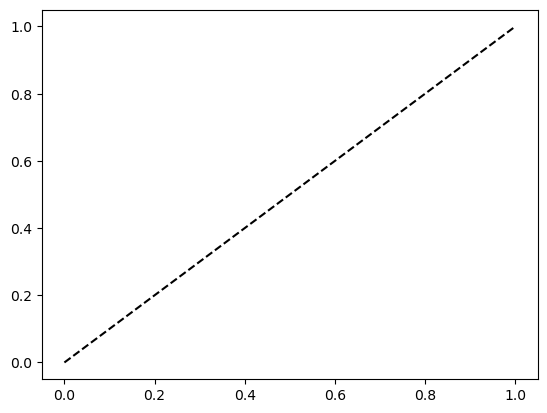

In [71]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')

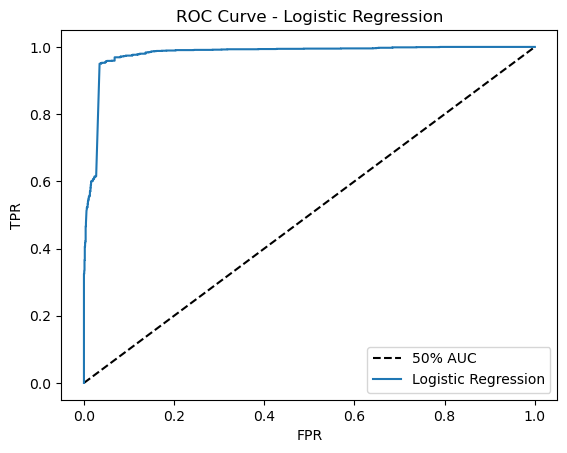

In [72]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc = 0)
plt.show()

In [73]:
roc_auc_score(y_test_up,y_test_auc)

0.9789608702402038

### Testing Real Data 

In [74]:
a = ['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']
a = Co.transform(a)
a = a.toarray()

In [75]:
lg.predict(a)

array([1])

In [76]:
b = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]
b = Co.transform(b)
b = b.toarray()

In [77]:
lg.predict(b)        

array([0])

In [78]:
# 0:ham, 1:spam

### Saving Data 

In [79]:
import pickle 

In [80]:
with open('count.pkl','wb') as f:
    pickle.dump(Co,f)

In [81]:
ch = pickle.load(open('count.pkl','rb'))

In [82]:
a = ['free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']
b = ch.transform(a)
b = b.toarray()

In [83]:
lg.predict(b)

array([1])

In [84]:
with open('spam.pkl','wb') as p:
    pickle.dump(lg,p)

In [85]:
sol = pickle.load(open('spam.pkl','rb'))


In [86]:
sol.predict(b)

array([1])

In [87]:
res = pd.DataFrame({'Actual':y_test_up, 'prediction':y_test_up_pred})
res

,Actual,prediction
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
3169,1,1
3170,1,1
3171,1,1
3172,1,1
